# Basic Tensors operation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
x=torch.ones(3,2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [3]:
x=torch.zeros(3,2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [4]:
x=torch.rand(3,2)
print(x)

tensor([[0.8062, 0.2075],
        [0.3692, 0.8798],
        [0.3366, 0.9383]])


In [5]:
x=torch.empty(3,2)
print(x)

tensor([[3.9989e-36, 0.0000e+00],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00]])


In [6]:
y=torch.zeros_like(x)
print(y)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [7]:
x=torch.linspace(0,1,steps=3)
x

tensor([0.0000, 0.5000, 1.0000])

In [8]:
x=torch.tensor([[1,2],[3,4],[5,6]])
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [9]:
print(x.size())

torch.Size([3, 2])


## slicing Tensors

In [10]:
print(x[:,1])

tensor([2, 4, 6])


In [11]:
print(x[0,1])

tensor(2)


In [12]:
print(x[0,:])

tensor([1, 2])


In [13]:
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [14]:
y=x[1,1]

In [15]:
print(y)

tensor(4)


In [16]:
print(y.item())  #gives scalar version

4


## Reshaping Tensors

In [17]:
print(x)
y=x.view(2,3)
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [18]:
y=x.view(6,-1)
print(y)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


#Simple Tensor Operations

In [19]:
x=torch.ones(3,2)
y=torch.ones(3,2)
z=x+y

In [20]:
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


In [21]:
z=x*y
print(z)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [22]:
z=y.add(x)
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


In [23]:
print(y)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [24]:
z=y.add_(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


## Numpy<> PyTorch

In [25]:
x_np=x.numpy()  #convert pytorch into numpy

In [26]:
print(x_np)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [27]:
print(type(x),type(x_np))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [28]:
# convert from numpy to pytorch
a=np.random.randn(5)
print(a)
a_pt=torch.from_numpy(a)
print(type(a_pt),type(a))
print(a_pt)

[ 0.83947229 -0.9292535   0.68368518 -1.54721389 -2.0519899 ]
<class 'torch.Tensor'> <class 'numpy.ndarray'>
tensor([ 0.8395, -0.9293,  0.6837, -1.5472, -2.0520], dtype=torch.float64)


In [29]:
np.add(a,1,out=a)
print(a)
print(a_pt)

[ 1.83947229  0.0707465   1.68368518 -0.54721389 -1.0519899 ]
tensor([ 1.8395,  0.0707,  1.6837, -0.5472, -1.0520], dtype=torch.float64)


#compare time required to perform operation in numpy and pytorch

In [30]:
%%time
for i in range(100):
  a=np.random.randn(100,100)
  b=np.random.randn(100,100)
  c=a+b
  

CPU times: user 88.6 ms, sys: 0 ns, total: 88.6 ms
Wall time: 95 ms


In [31]:
%%time
for i in range(100):
  a=torch.randn(100,100)
  b=torch.randn(100,100)
  c=a+b

CPU times: user 22.9 ms, sys: 0 ns, total: 22.9 ms
Wall time: 25.3 ms


## CUDA Support

In [32]:
print(torch.cuda.device_count)  #GPU

<function device_count at 0x7f559a4698c8>


In [33]:
print(torch.cuda.device(0))

In [34]:
print(torch.cuda.get_device_name(0)) #Edit->Notebook setting-> GPU

Tesla P100-PCIE-16GB


In [35]:
cuda0=torch.device('cuda:0')

In [36]:
print(cuda0)

cuda:0


In [37]:
a=torch.ones(3,2,device=cuda0)
b=torch.ones(3,2,device=cuda0)
c=a+b


In [38]:
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [39]:
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')


In [40]:
%%time
for i in range(10):
  a=np.random.randn(100,100)
  b=np.random.randn(100,100)
  np.add(b,a)

CPU times: user 8.48 ms, sys: 125 µs, total: 8.61 ms
Wall time: 11.4 ms


In [41]:
%%time
for i in range(10):
  a_cpu=torch.randn(100,100)
  b_cpu=torch.randn(100,100)
  b_cpu.add_(a_cpu)

CPU times: user 4.41 ms, sys: 18 µs, total: 4.43 ms
Wall time: 5.18 ms


In [42]:
%%time
for i in range(10):
  a_gpu=torch.randn([100,100],device=cuda0)   #mention device name
  b_gpu=torch.randn([100,100],device=cuda0)
  b_gpu.add_(a_gpu)

CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 2.69 ms


## Autograd

In [43]:
x=torch.ones([3,2],requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [44]:
y=x+5
print(y)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)


In [45]:
z=y*y+1
print(z)

tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)


In [46]:
t=torch.sum(z)
print(t)

tensor(222., grad_fn=<SumBackward0>)


In [47]:
t.backward()

In [48]:
print(x.grad)

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


In [49]:
x=torch.ones([3,2],requires_grad=True)
y=x+5
r=1/(1+torch.exp(-y))
print(r)
s=torch.sum(r)
s.backward()
print(x.grad)

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


##Autograd Example that looks like what we have been doing

In [50]:
x=torch.randn([20,1],requires_grad=True)
y=3*x -2

In [51]:
w=torch.tensor([1.],requires_grad=True)
b=torch.tensor([1.],requires_grad=True)

In [52]:
print(w.item())

1.0


In [53]:
y_hat=w*x + b
loss=torch.sum((y_hat-y)**2)

In [54]:
print(loss)

tensor(263.9976, grad_fn=<SumBackward0>)


In [55]:
loss.backward()

In [56]:
print(w.grad,b.grad)

tensor([-70.9035]) tensor([128.7294])


increase the value of w so that loss can reduced and decrease the value of b

Do it in a loop

In [57]:
learning_rate=0.01
w=torch.tensor([1.],requires_grad=True)
b=torch.tensor([1.],requires_grad=True)
print(w.item(),b.item())
for i in range(10):
  x=torch.randn([20,1])
  y=3*x-2

  y_hat=w*x+b
  loss=torch.sum((y_hat-y)**2)
  
  loss.backward()

  with torch.no_grad():
    w-=learning_rate * w.grad
    b-=learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

  print(w.item(), b.item())

1.0 1.0
1.6661875247955322 -0.19609558582305908
2.063281297683716 -0.9606181383132935
2.3961241245269775 -1.4016765356063843
2.5871200561523438 -1.6325010061264038
2.6232635974884033 -1.7075374126434326
2.6852548122406006 -1.7675237655639648
2.756598711013794 -1.8319400548934937
2.8867878913879395 -1.8906588554382324
2.960705041885376 -1.932905912399292
2.9670674800872803 -1.9594447612762451


Do it for long loop:

In [58]:
%%time
learning_rate=0.01
N=1000
epochs=2000
w=torch.randn([N], requires_grad=True)
b=torch.ones([1], requires_grad=True)
print(torch.mean(w).item(), b.item())
for i in range(epochs):
  x=torch.randn([N])
  y=torch.dot(3*torch.ones([N]),x)-2

  y_hat=torch.dot(w,x) + b
  loss=torch.sum((y_hat-y)**2)
  loss.backward()
  with torch.no_grad():
    w-=learning_rate*w.grad 
    b-=learning_rate*b.grad 

    w.grad.zero_()
    b.grad.zero_()
  print(torch.mean(w).item(),b.item())


-0.01833326742053032 1.0
-0.010569112375378609 1.5121057033538818
0.01948767900466919 2.7921881675720215
0.0232204832136631 1.173089861869812
0.07916878908872604 -0.8617874383926392
0.10479870438575745 1.9124647378921509
0.14696411788463593 0.21474826335906982
0.1699950098991394 -1.1179465055465698
0.16287490725517273 0.1436084508895874
0.20576509833335876 2.443126678466797
0.25908946990966797 1.263235330581665
0.6220612525939941 -6.575336456298828
0.654536783695221 -13.275336265563965
0.6719334721565247 -13.988648414611816
0.6960052251815796 -16.43039894104004
0.6555649042129517 -18.08787727355957
0.6063546538352966 -9.20028305053711
-0.01960732974112034 -23.18755340576172
0.0009863099548965693 -23.958248138427734
0.29433825612068176 -20.159284591674805
0.12387216091156006 -32.80335998535156
0.14133544266223907 -22.778079986572266
0.18114537000656128 -21.39128303527832
0.18314160406589508 -18.63835906982422
0.369088351726532 -15.155723571777344
0.1264917254447937 -22.38621711730957
-0

In [59]:
%%time
learning_rate=0.01
N=1000
epochs=2000
w=torch.randn([N], requires_grad=True, device=cuda0)
b=torch.ones([1], requires_grad=True,device=cuda0)
print(torch.mean(w).item(), b.item())
for i in range(epochs):
  x=torch.randn([N],device=cuda0)
  y=torch.dot(3*torch.ones([N],device=cuda0),x)-2

  y_hat=torch.dot(w,x) + b
  loss=torch.sum((y_hat-y)**2)
  loss.backward()
  with torch.no_grad():
    w-=learning_rate*w.grad 
    b-=learning_rate*b.grad 

    w.grad.zero_()
    b.grad.zero_()
  print(torch.mean(w).item(),b.item())

-0.020481428131461143 1.0
0.15364143252372742 -2.2229390144348145
0.10908252745866776 -3.269381523132324
0.11446136981248856 -2.8213210105895996
0.0870845690369606 -3.7277474403381348
0.07178284227848053 -6.459649085998535
0.07030466198921204 -6.609301567077637
0.10688996315002441 -3.922549247741699
0.12413527816534042 -3.3611252307891846
0.19355061650276184 -1.142573595046997
0.39657920598983765 2.350853681564331
0.4161388874053955 6.227595329284668
0.40895578265190125 5.65409517288208
0.40309420228004456 1.719470739364624
0.5920119285583496 -5.2431440353393555
0.025385743007063866 10.835354804992676
0.11201799660921097 6.1130571365356445
0.10855243355035782 20.062458038330078
0.008199402131140232 24.275569915771484
0.002305389614775777 23.42877960205078
0.03812786936759949 18.17030906677246
0.0006960449391044676 -0.2016773223876953
-0.07508603483438492 5.398043632507324
-0.11007161438465118 -19.388084411621094
-0.3054932951927185 -30.584003448486328
-0.3227384686470032 -31.4402847290

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook
import time
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import torch

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [61]:
torch.manual_seed(0)

In [62]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list(" ",["red","green","blue"])

## Generate Data

In [63]:
data,labels=make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)

In [64]:
print(data.shape,labels.shape)

(1000, 2) (1000,)


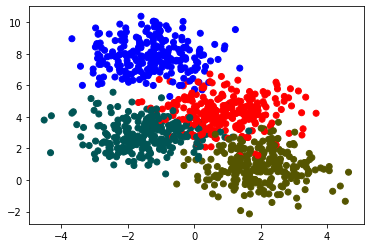

In [65]:
plt.scatter(data[:,0], data[:,1], c=labels,cmap=my_cmap)
plt.show()

In [66]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
(X_train.shape,X_val.shape,labels.shape)

((750, 2), (250, 2), (1000,))

## Using torch tensors and autograd

In [67]:
X_train,Y_train,X_val,Y_val=map(torch.tensor,(X_train,Y_train,X_val,Y_val))

In [68]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [74]:

#function for computing forward pass in the network
def model(x):
    a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
    h1 = a1.sigmoid() # (N, 2)
    a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4)
    return h2

In [75]:

#demo of how we calculate the cross entropy loss

y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])
y = torch.tensor([2, 0])
(-y_hat[range(y_hat.shape[0]), y].log()).mean().item()
(torch.argmax(y_hat, dim=1) == y).float().mean().item()

0.5

In [76]:

#function to calculate loss of a function.
#y_hat -> predicted & y -> actual
def loss_fn(y_hat, y):
    return -(y_hat[range(y.shape[0]), y].log()).mean()

In [77]:
def accuracy(y_hat, y):
    pred = torch.argmax(y_hat, dim=1)
    return (pred == y).float().mean()

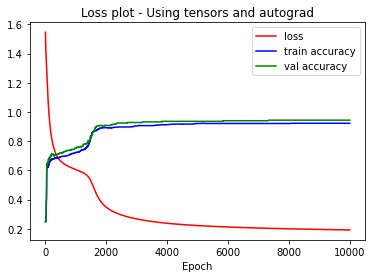

Loss before training 1.5456441640853882
Loss after training 0.19288592040538788


In [78]:
#set the seed
torch.manual_seed(0)

#initialize the weights and biases using Xavier Initialization
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

#set the parameters for training the model
learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()
X_val = X_val.float()
Y_val = Y_val.long()

loss_arr = []
acc_arr = []
val_acc_arr = []

#training the network
for epoch in range(epochs):
    y_hat = model(X_train)  #compute the predicted distribution
    loss = loss_fn(y_hat, Y_train) #compute the loss of the network
    loss.backward() #backpropagate the gradients
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    with torch.no_grad(): #update the weights and biases
        val_acc_arr.append(accuracy(model(X_val),Y_val))
        
        weights1 -= weights1.grad * learning_rate
        bias1 -= bias1.grad * learning_rate
        weights2 -= weights2.grad * learning_rate
        bias2 -= bias2.grad * learning_rate
        weights1.grad.zero_()
        bias1.grad.zero_()
        weights2.grad.zero_()
        bias2.grad.zero_()

plt.plot(loss_arr, 'r-', label='loss')
plt.plot(acc_arr, 'b-', label='train accuracy')
plt.plot(val_acc_arr, 'g-', label='val accuracy')
plt.title("Loss plot - Using tensors and autograd")
plt.xlabel("Epoch")
plt.legend(loc='best')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using Neural Network Functional with PyTorch

In [79]:
import torch.nn.functional as F

In [81]:
torch.manual_seed(0)

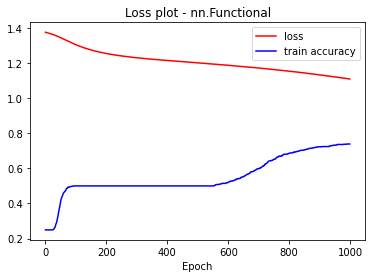

Loss before training 1.3752669095993042
Loss after training 1.1091142892837524


In [84]:
weights1=torch.randn(2,2)/math.sqrt(2)
weights1.requires_grad_()
bias1=torch.ones(2, requires_grad=True)

weights2=torch.randn(2,4)/math.sqrt(2)
weights2.requires_grad_()
bias2=torch.ones(4, requires_grad=True)

epochs=1000
learning_rate=0.2

X_train=X_train.float()
Y_train=Y_train.long()


loss_arr=[]
acc_arr=[]

for i in range(epochs):
  y_hat=model(X_train)
  loss = F.cross_entropy(y_hat, Y_train) 
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat,Y_train))

  with torch.no_grad():
    weights1 -= learning_rate *weights1.grad
    weights2 -=learning_rate * weights2.grad
    bias1 -=learning_rate * bias1.grad
    bias2 -= learning_rate * bias2.grad

    weights1.grad.zero_()
    weights2.grad.zero_()
    bias1.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-', label='loss')
plt.plot(acc_arr, 'b-', label='train accuracy')
plt.legend(loc='best')
plt.title("Loss plot - nn.Functional")
plt.xlabel("Epoch")
plt.show()   
    

print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])


## Using NN Parameter

In [114]:
import torch.nn as nn

In [115]:
class FirstNetwork(nn.Module):
  
    def __init__(self):    
        super().__init__()
        torch.manual_seed(0)
        #wrap all the weights and biases inside nn.parameter()
        self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
        self.bias1 = nn.Parameter(torch.zeros(2))
        self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
        self.bias2 = nn.Parameter(torch.zeros(4))
    
    def forward(self, X):
        a1 = torch.matmul(X, self.weights1) + self.bias1
        h1 = a1.sigmoid()
        a2 = torch.matmul(h1, self.weights2) + self.bias2
        h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
        return h2

In [116]:

def fit(epochs = 10000, learning_rate = 0.2, title = ""):
    loss_arr = []
    acc_arr = []
    for epoch in range(epochs):
        y_hat = model(X_train) #forward pass
        loss = F.cross_entropy(y_hat, Y_train) #loss calculation
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))
        loss.backward() #backpropagation
        with torch.no_grad():
            #updating the parameters
            for param in model.parameters():
                param -= learning_rate * param.grad
            model.zero_grad() #setting the gradients to zero
        
    plt.plot(loss_arr, 'r-', label='loss')
    plt.plot(acc_arr, 'b-', label='train accuracy')
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.show()      
    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])

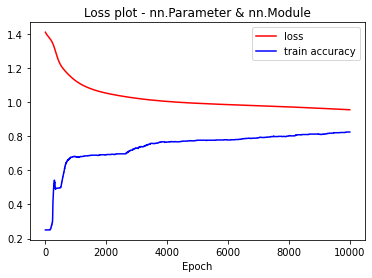

Loss before training 1.4111980199813843
Loss after training 0.9561843276023865


In [117]:

#we first have to instantiate our model
model = FirstNetwork() 

#call fit method
fit(10000,0.2,"Loss plot - nn.Parameter & nn.Module")

## Using NN.Linear and Optim

In [118]:

class FirstNetwork_v1(nn.Module):
    
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.lin1 = nn.Linear(2, 2) #automatically defines weights and biases
        self.lin2 = nn.Linear(2, 4)
    
    def forward(self, X):
        a1 = self.lin1(X) #computes the dot product and adds bias
        h1 = a1.sigmoid()
        a2 = self.lin2(h1) #computes dot product and adds bias
        h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
        return h2

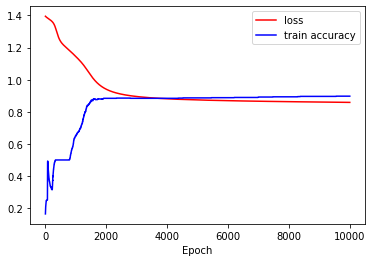

Loss before training 1.395160436630249
Loss after training 0.8586323857307434


In [120]:

model = FirstNetwork_v1()
fit()

In [121]:
from torch import optim

In [122]:

def fit_v1(epochs = 10000, learning_rate = 0.2, title = ""):
    loss_arr = []
    acc_arr = []
    
    opt = optim.SGD(model.parameters(), lr=learning_rate) #define optimizer
  
    for epoch in range(epochs):
        y_hat = model(X_train)
        loss = F.cross_entropy(y_hat, Y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))

        loss.backward() 
        opt.step() #updating each parameter.
        opt.zero_grad()  #resets the gradient to 0
        
    plt.plot(loss_arr, 'r-', label='loss')
    plt.plot(acc_arr, 'b-', label='train accuracy')
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.show()      
    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])

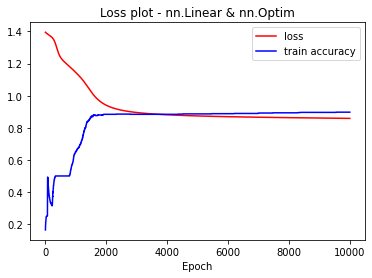

Loss before training 1.395160436630249
Loss after training 0.8586323857307434


In [123]:
model = FirstNetwork_v1()
fit_v1(10000, 0.2, "Loss plot - nn.Linear & nn.Optim")

## Using NN Sequential

In [130]:
class FirstNetwork_v2(nn.Module):
    
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential( #sequential operation
            nn.Linear(2, 2), 
            nn.Sigmoid(), 
            nn.Linear(2, 4), 
            nn.Softmax())

    def forward(self, X):
        return self.net(X)

In [131]:
model = FirstNetwork_v2() #object

def fit_v2(x, y, model, opt, loss_fn, epochs = 10000):
    """Generic function for training a model """
    for epoch in range(epochs):
        loss = loss_fn(model(x), y) 

        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item()

In [132]:
#define loss 
loss_fn = F.cross_entropy
#define optimizer 
opt = optim.SGD(model.parameters(), lr=0.2)

#training model 
fit_v2(X_train, Y_train, model, opt, loss_fn)

0.8586323857307434

## Running it on GPU's

In [133]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu") #create a device

In [134]:
#moving inputs to GPU
X_train=X_train.to(device)
Y_train=Y_train.to(device)

model = FirstNetwork_v2()
model.to(device) #moving the network to GPU

#calculate time
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, model, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3951594829559326
Time taken 7.726855278015137


In [135]:

class FirstNetwork_v3(nn.Module):
  
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
            nn.Linear(2, 1024*4), 
            nn.Sigmoid(), 
            nn.Linear(1024*4, 4), 
            nn.Softmax())

    def forward(self, X):
        return self.net(X)

In [136]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)

#training on gpu
fn = FirstNetwork_v3()
fn.to(device)

tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3890225887298584
Time taken 223.93126916885376
